# Multiple Inputs usage

Example created by Wilson Rocha Lacerda Junior

## Generating 2 input 1 output sample data


The data is generated by simulating the following model:

$y_k = 0.4y_{k-1}^2 + 0.1y_{k-1}x1_{k-1} + 0.6x2_{k-1} -0.3x1_{k-1}x2_{k-2} + e_{k}$

If *colored_noise* is set to True:

$e_{k} = 0.8\nu_{k-1} + \nu_{k}$

where $x$ is a uniformly distributed random variable and $\nu$ is a gaussian distributed variable with $\mu=0$ and $\sigma=0.001$


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sysidentpy.polynomial_basis import PolynomialNarmax
from sysidentpy.metrics import root_relative_squared_error
from sysidentpy.utils.generate_data import get_miso_data, get_siso_data

In [2]:
x_train, x_valid, y_train, y_valid = get_miso_data(n=1000,
                                                   colored_noise=False,
                                                   sigma=0.001,
                                                   train_percentage=90)

There is specific diferences for multiple input data.

- You have to set the number of inputs (*n_inputs=2* in this example)
- You have to pass the lags for each input in a nested list (*e.g., [[1, 2], [1, 2]]*)

The remainder settings remains the same.

## Build the model

In [3]:
model = PolynomialNarmax(non_degree=2,
                         order_selection=True,
                         n_info_values=15,
                         n_terms=4,
                         extended_least_squares=False,
                         ylag=2, xlag=[[1, 2], [1, 2]],
                         n_inputs=2,
                         info_criteria='lilc',
                         estimator='least_squares',
                         )

In [4]:
model.fit(x_train, y_train)

## Model evaluation

0.002440520762176125
       Regressors Parameters         ERR
0         x2(k-1)     0.6000  0.91070733
1  x2(k-2)x1(k-1)    -0.2997  0.04434814
2        y(k-1)^2     0.3999  0.04463687
3   x1(k-1)y(k-1)     0.0996  0.00030042


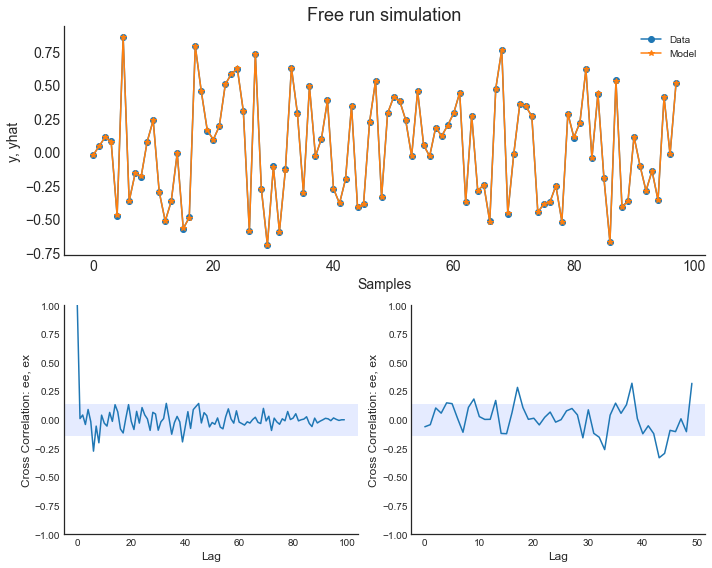

In [5]:
yhat = model.predict(x_valid, y_valid)
rrse = root_relative_squared_error(y_valid, yhat)
print(rrse)

results = pd.DataFrame(model.results(err_precision=8,
                                     dtype='dec'),
                       columns=['Regressors', 'Parameters', 'ERR'])

print(results)

ee, ex, extras, lam = model.residuals(x_valid, y_valid, yhat)
model.plot_result(y_valid, yhat, ee, ex)

Text(0, 0.5, 'Information Criteria')

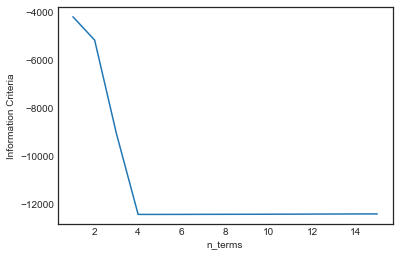

In [6]:
xaxis = np.arange(1, model.n_info_values + 1)
plt.plot(xaxis, model.info_values)
plt.xlabel('n_terms')
plt.ylabel('Information Criteria')